In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import geopandas as gpd
import rioxarray as rxr 

In [3]:
from rasterio.plot import plotting_extent

In [4]:
import earthpy as et
import earthpy.plot as ep

In [5]:
sns.set(font_scale=1.5, style="whitegrid")

In [6]:
et.data.get_data("colorado-flood")

os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

In [7]:
# Challenge 1: Open and Plot Hillshade

lidar_dsm_path = os.path.join("colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DTM_hill.tif")


lidar_dsm_xr = rxr.open_rasterio(lidar_dsm_path, masked=True).squeeze()
lidar_dsm_xr

<xarray.DataArray (y: 2000, x: 4000)> Size: 32MB
[8000000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

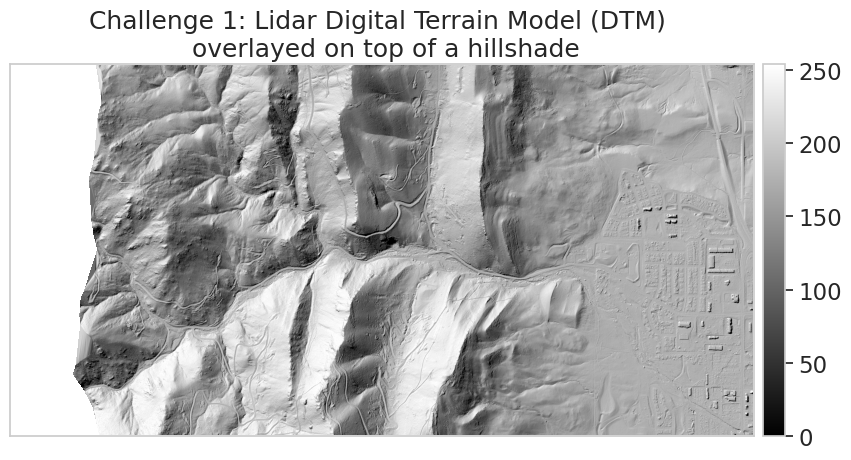

In [8]:
# Challenge 1: Open and Plot Hillshade

f, ax = plt.subplots(figsize=(10, 6))

ep.plot_bands(lidar_dsm_xr,ax=ax,cmap='gray', title="Challenge 1: Lidar Digital Terrain Model (DTM) \n overlayed on top of a hillshade")

ep.plot_bands(lidar_dsm_xr, cmap='gray', alpha=0.7, ax=ax, cbar=False)

plt.show()

In [18]:
# Challenge 2: Overlay DTM Over DTM Hillshade

lidar_dsm_path = os.path.join("colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DTM_hill.tif")

lidar_dem_path = os.path.join("colorado-flood", 
                              "spatial", 
                              "boulder-leehill-rd", 
                              "pre-flood", 
                              "lidar", 
                              "pre_DTM.tif")

lidar_dem_im = rxr.open_rasterio(lidar_dem_path, masked=True)

lidar_hs_path = os.path.join("colorado-flood", 
                             "spatial", 
                              "boulder-leehill-rd", 
                             "pre-flood", 
                              "lidar", 
                             "pre_DTM_hill.tif")

lidar_dem_hill = rxr.open_rasterio(lidar_hs_path, masked=True)

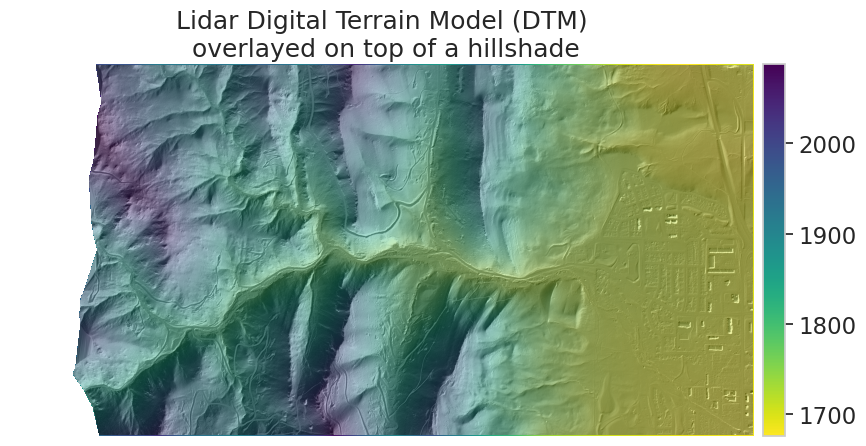

In [21]:
# Challenge 2: Overlay DTM Over DTM Hillshade

fig, ax = plt.subplots(figsize=(10, 6))

ep.plot_bands(lidar_dem_im, ax=ax, cmap='viridis_r',title="Lidar Digital Terrain Model (DTM)\n overlayed on top of a hillshade")

ep.plot_bands(lidar_dem_hill, cmap='Greys', alpha=0.6, ax=ax, cbar=False)

ax.set_axis_off()

plt.show()

In [27]:
# Challenge 3: Add A Site Boundary to Your Raster Plot

site_bound_path = os.path.join("colorado-flood", 
                              "spatial", 
                              "boulder-leehill-rd", 
                              "clip-extent.shp")


site_bound_shp = gpd.read_file(site_bound_path)

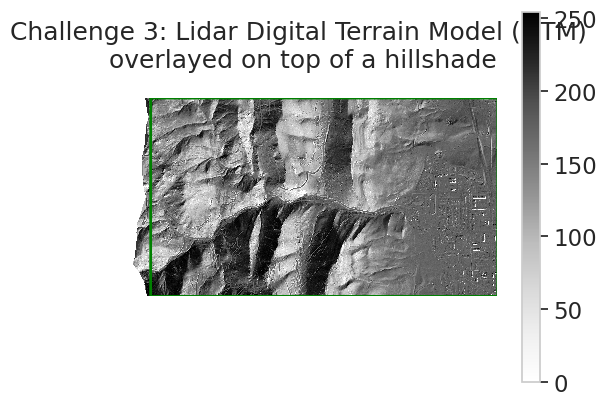

In [35]:
# Challenge 3: Add A Site Boundary to Your Raster Plot

f, ax = plt.subplots()

lidar_dem_hill.plot(cmap="Greys",
                  ax=ax)
site_bound_shp.plot(color='None',
                    edgecolor='Green',
                    linewidth=2,
                    ax=ax,
                    zorder=4)


ax.set(title="Challenge 3: Lidar Digital Terrain Model (DTM)\n overlayed on top of a hillshade")
ax.axis('off')
plt.show()

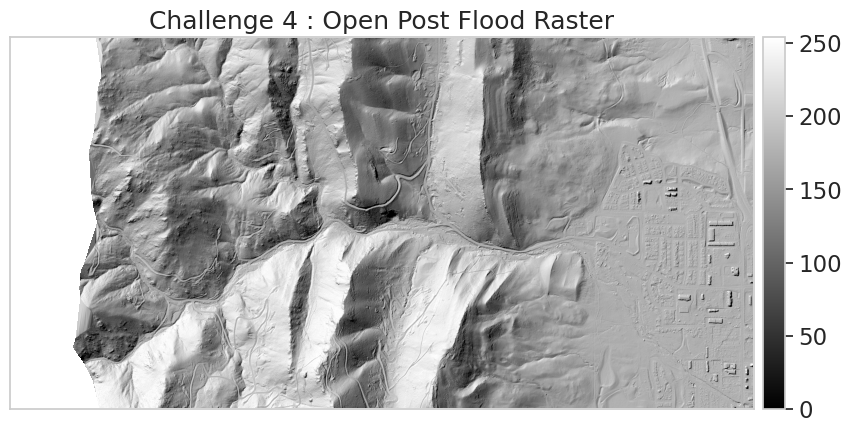

In [43]:
# Challenge 4 : Open Post Flood Raster

f, ax = plt.subplots(figsize=(10, 6))

ep.plot_bands(lidar_dsm_xr,ax=ax,cmap='gray', title="Challenge 4 : Open Post Flood Raster")

ep.plot_bands(lidar_dsm_xr, cmap='gray', alpha=0.7, ax=ax, cbar=False)

plt.show()